# __More Data Exploration__

In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Visualising More Stock Data

In [27]:
df = (pd.DataFrame({
    'APOLLOTYRE' : pd.read_csv('./stocks/APOLLOTYRE.NS.csv')[::-1]['Close'].values,
    'BERGEPAINT' : pd.read_csv('./stocks/BERGEPAINT.NS.csv')[::-1]['Close'].values,
    'IDBI' : pd.read_csv('./stocks/IDBI.NS.csv')[::-1]['Close'].values,
    'PNB' : pd.read_csv('./stocks/PNB.NS.csv')[::-1]['Close'].values,
    'VOLTAS' : pd.read_csv('./stocks/VOLTAS.NS.csv')[::-1]['Close'].values
}).pct_change()*100).dropna()
df

,APOLLOTYRE,BERGEPAINT,IDBI,PNB,VOLTAS
1,-1.784102,-2.635200,-1.260507,-2.795527,-4.858980
2,-0.708124,-0.141388,1.418440,1.643385,0.529915
3,-0.465116,-0.849511,-0.279715,-0.727560,-0.702823
4,2.897193,3.998363,4.347823,5.944627,2.123402
5,3.148660,0.362889,0.806449,2.536501,-0.625286
...,...,...,...,...,...
484,-0.785099,1.163016,-2.054232,-5.696383,-0.827698
485,2.576371,1.475369,5.536920,3.986705,1.508711
486,0.089702,0.811943,-2.941181,1.190824,0.237173
487,0.035840,0.262215,1.474205,-0.832375,-1.277709


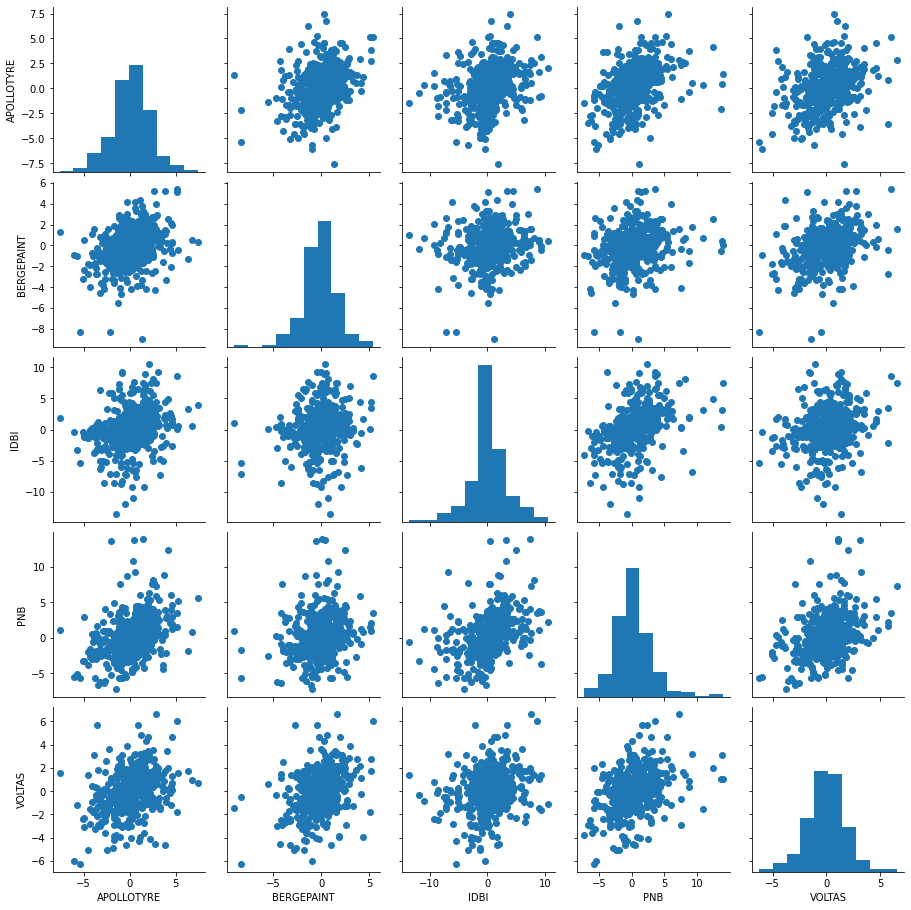

In [28]:
g = sns.PairGrid(df)
g.map_diag(plt.hist)
g.map_offdiag(plt.scatter)

## Rolling Standard Deviation

In [29]:
rolavg = df['PNB'].rolling(7).std()
rolavg

1           NaN
2           NaN
3           NaN
4           NaN
5           NaN
         ...   
484    4.990273
485    4.027733
486    3.927181
487    3.419073
488    3.431420
Name: PNB, Length: 488, dtype: float64

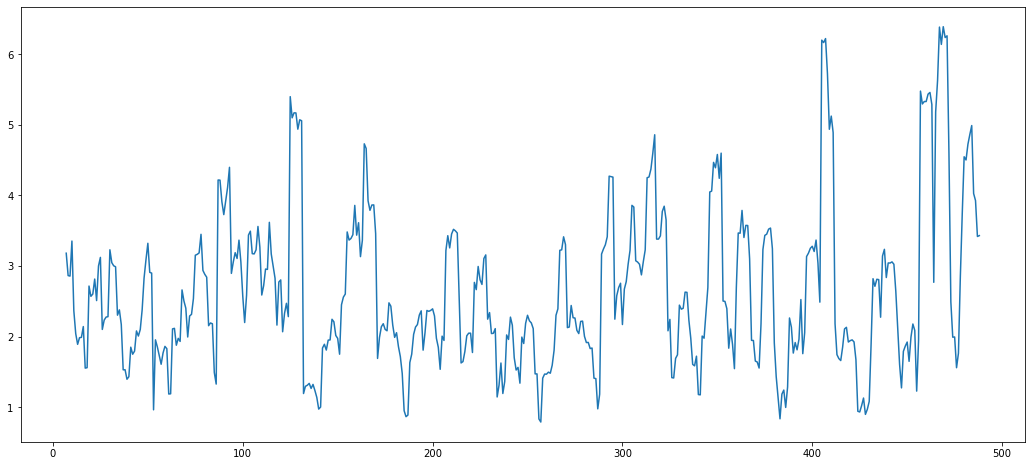

In [30]:
plt.figure(figsize=(18,8))
plt.plot(rolavg)

## Comparison with Market Index (Nifty50) 

In [31]:
nifty = pd.read_csv('./stocks/^NSEI.csv')[::-1]
nifty['Change'] = nifty['Close'].pct_change()*100
nifty = nifty.dropna()
nifty.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Change
487,2020-01-08,11939.099609,12044.950195,11929.599609,12025.349609,12025.349609,446000.0,-1.559859
486,2020-01-07,12079.099609,12152.150391,12005.349609,12052.950195,12052.950195,447800.0,0.229520
485,2020-01-06,12170.599609,12179.099609,11974.200195,11993.049805,11993.049805,396500.0,-0.496977
484,2020-01-03,12261.099609,12265.599609,12191.349609,12226.650391,12226.650391,428800.0,1.947800
483,2020-01-02,12198.549805,12289.900391,12195.250000,12282.200195,12282.200195,407700.0,0.454334


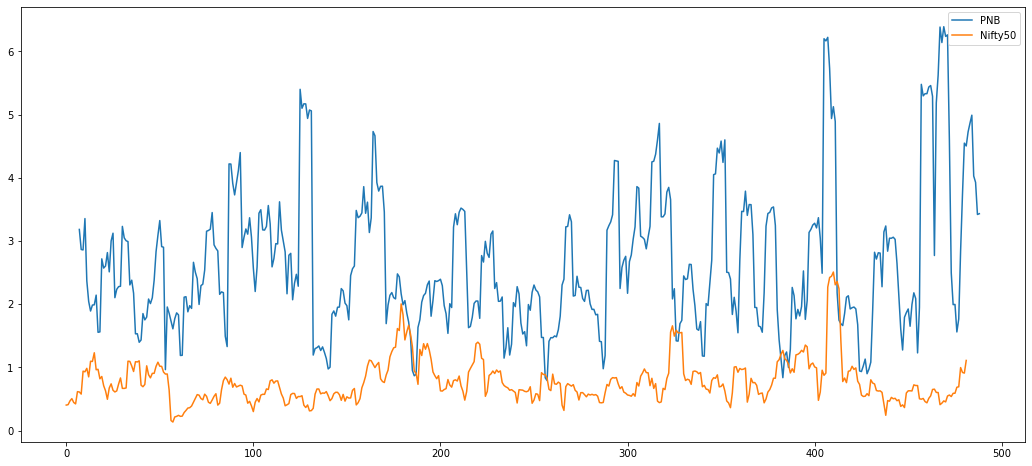

In [32]:
plt.figure(figsize=(18,8))
plt.plot(rolavg, label='PNB')
plt.plot(nifty['Change'].rolling(7).std(), label='Nifty50')
plt.legend(loc='upper right')

## Simple Moving Average

In [33]:
tsla = pd.read_csv('./stocks/TSLA01.csv')
tsla['Date'] = tsla['Date'].astype(np.dtype('datetime64[ns]'))

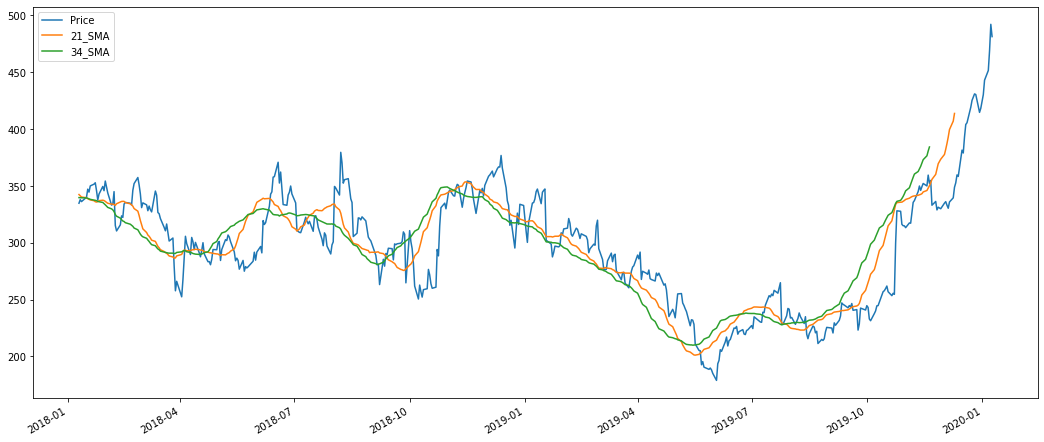

In [34]:
plt.figure(figsize=(18,8))
plt.plot(tsla['Date'],tsla['Close'], label='Price')
plt.plot(tsla['Date'],tsla['Close'].rolling(21).mean(),label='21_SMA')
plt.plot(tsla['Date'],tsla['Close'].rolling(34).mean(), label='34_SMA')
plt.legend(loc='upper left')
plt.gcf().autofmt_xdate()

## Bollinger Bands

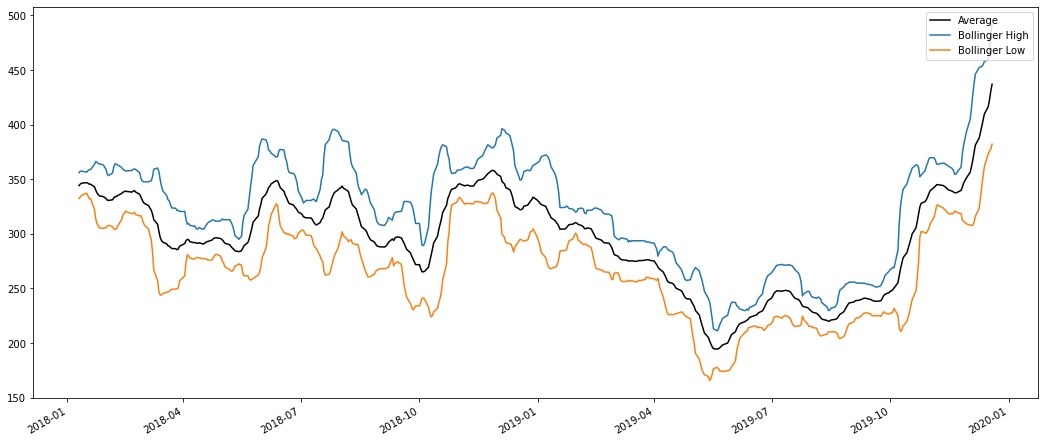

In [35]:
rolm = tsla['Close'].rolling(14).mean()
rols = tsla['Close'].rolling(14).std()

tsla['Rolling Mean'] = rolm
tsla['Bollinger High'] = rolm + (rols * 2)
tsla['Bollinger Low'] = rolm - (rols * 2)

plt.figure(figsize=(18,8))
plt.plot(tsla['Date'],tsla['Rolling Mean'], label='Average', c='black')
plt.plot(tsla['Date'],tsla['Bollinger High'], label='Bollinger High')
plt.plot(tsla['Date'],tsla['Bollinger Low'], label='Bollinger Low')
plt.legend(loc='upper right')
plt.gcf().autofmt_xdate()

In [37]:
tsla.to_csv('./stocks/TSLA02.csv', index=False)